In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-object-detection/data/sample_submission.csv
/kaggle/input/car-object-detection/data/train_solution_bounding_boxes (1).csv
/kaggle/input/car-object-detection/data/testing_images/vid_5_26420.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_31520.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_29420.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_31720.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_26560.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_27840.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_28560.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_28360.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_25240.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_29560.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_29020.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_30720.jpg
/kaggle/

**Basic operations on images**

In [2]:
!pip list | grep opencv

opencv-contrib-python                    4.9.0.80
opencv-python                            4.9.0.80
opencv-python-headless                   4.9.0.80


In [3]:
!pip install scikit-image

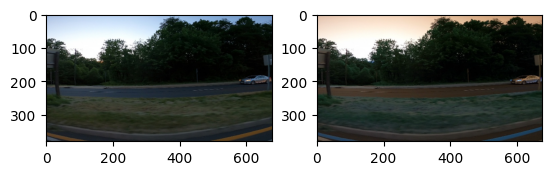

In [4]:
from skimage import io
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read an image 
image = io.imread ('/kaggle/input/car-object-detection/data/testing_images/vid_5_26880.jpg')

# split the loaded image into its three channels (b, g, r)
b, g, r = cv2.split (image)
img_matplotlib = cv2.merge ([r, g, b])

# show both images using matplotlib
plt.subplot (121)  # show image in wrong color
plt.imshow (image)

# show image in true color
plt.subplot (122)
plt.imshow (img_matplotlib)
plt.show ()

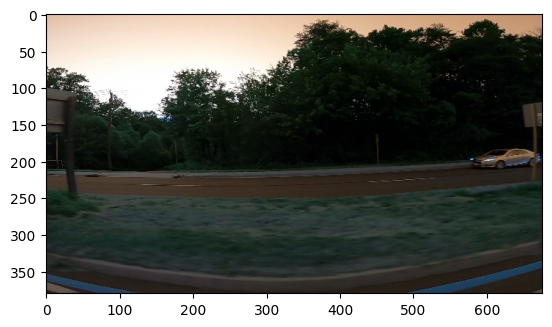

In [5]:
# plt.imshow(img) shown an image with wrong colorspace. we should correct the colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

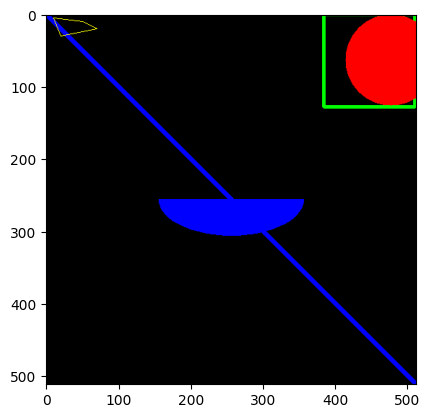

In [6]:
# create a black image
img = np.zeros ((512, 512, 3), np.uint8)

# draw a diagonal blue line with thickness of 5 px
img = cv2.line (img, (0,0), (511, 511), (255, 0, 0), 5)

# drawning rectangle
img = cv2.rectangle (img, (384, 0), (510, 128), (0, 255, 0), 3)

# drawning circle
img = cv2.circle (img, (477, 63), 63, (0, 0, 255), -1)

# drawning ellipse
img = cv2.ellipse (img, (256, 256), (100, 50), 0, 0, 180, 255, -1)

# drawning polygon
pts = np.array ([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape ((-1, 1, 2))
img = cv2.polylines (img, [pts], True, (0, 255, 255))

plt.imshow (cv2.cvtColor (img, cv2.COLOR_BGR2RGB))

In [7]:
# acessing and modiying pixel values
px = img [100, 100]
print (px)
image [100, 100] = [255, 255, 255]
print (img [100, 100])

[255   0   0]
[255   0   0]


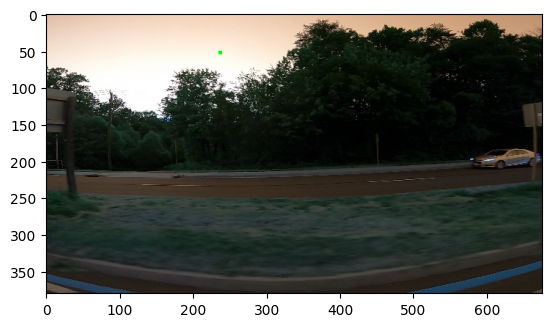

In [8]:
# changing pixel values
for i in range (5):
    for j in range (5):
        image[50 + i, 235 + j] = (0, 255, 0)
        
plt.imshow (image)

In [9]:
# accessing image properties
print (image.shape)
print (image.size)
print (image.dtype)

(380, 676, 3)
770640
uint8


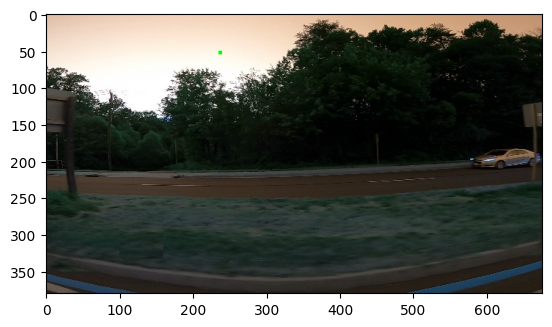

In [10]:
# image ROI
car = image [280:340, 330:390]
image [273:333, 100:160] = car
plt.imshow (image)

In [11]:
# splitting and merging image channels
b, g, r = cv2.split (image)
image = cv2.merge ((b, g, r))

print (r)

[[164 164 164 ... 111 111 111]
 [164 165 165 ... 111 112 112]
 [165 166 166 ... 112 112 111]
 ...
 [ 27  24  26 ...  60  61  62]
 [ 28  28  31 ...  57  57  59]
 [ 28  28  30 ...  56  58  59]]


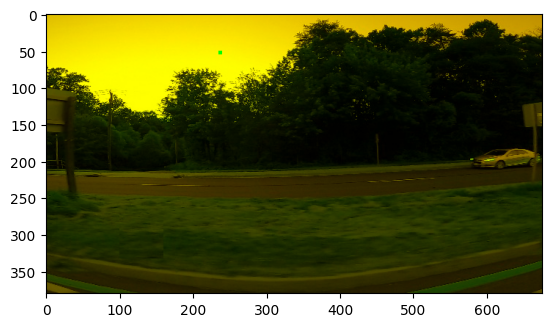

In [12]:
# set all the red pixels to zero using numpy indexing
image [:, :, 2] = 0

plt.imshow (image)

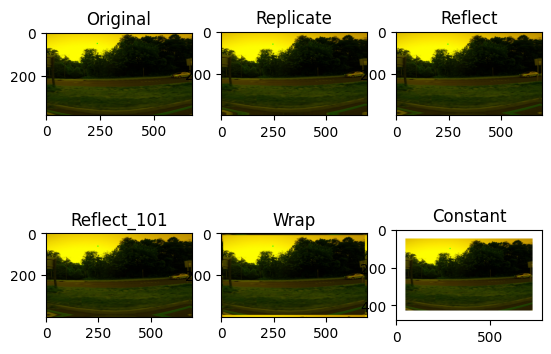

In [13]:
# making borders for images (padding)
replicate = cv2.copyMakeBorder (image, 10, 10, 10, 10, cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder (image, 10, 10, 10, 10, cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder (image, 10, 10, 10, 10, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder (image, 10, 10, 10, 10, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder (image, 50, 50, 50, 50, cv2.BORDER_CONSTANT, value = [255, 255, 255])

plt.subplot (231), plt.imshow (image), plt.title ("Original")
plt.subplot (232), plt.imshow (replicate), plt.title ('Replicate')
plt.subplot (233), plt.imshow (reflect), plt.title ('Reflect')
plt.subplot (234), plt.imshow (reflect101), plt.title ('Reflect_101')
plt.subplot (235), plt.imshow (wrap), plt.title ('Wrap')
plt.subplot (236), plt.imshow (constant), plt.title ('Constant')

plt.show ()